png 
  2

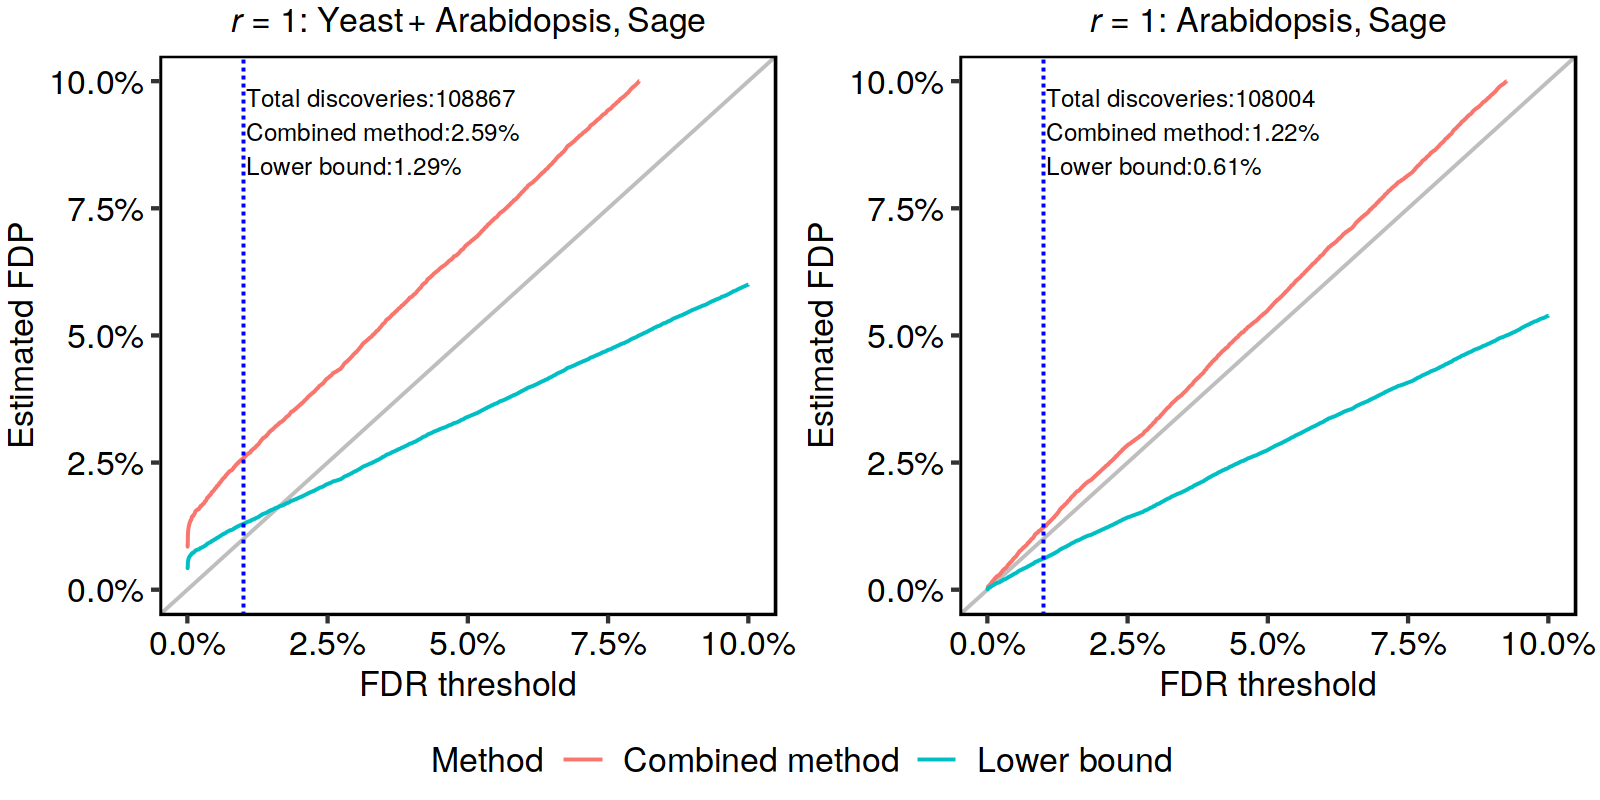

In [1]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
library(ggtext)
color_mapping <- c("Paired method" = "#7CAE00", "Sample method" = "#C77CFF", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")
report_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/sage_UP000005640_9606_I2L_multiple_species_entrapment_peptide_level/result1_yeast_arabidopsis/results.sage.tsv"
pro_fdp_file1 <- run_sage_fdp_analysis(report_file,level = "peptide",prefix = "sage-peptide",r=1,pep_file = "-")
g1 <- plot_fdp_fdr_v2(pro_fdp_file1,fdr_max = 0.1,fig_title="<i>r</i> = 1: Yeast + Arabidopsis, Sage",add_numbers = TRUE, color_mapping = color_mapping)

report_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/sage_UP000005640_9606_I2L_multiple_species_entrapment_peptide_level/result1_arabidopsis/results.sage.tsv"
pro_fdp_file2 <- run_sage_fdp_analysis(report_file,level = "peptide",prefix = "sage-peptide",r=1,pep_file = "-")
g2 <- plot_fdp_fdr_v2(pro_fdp_file2,fdr_max = 0.1,fig_title="<i>r</i> = 1: Arabidopsis, Sage",add_numbers = TRUE, color_mapping = color_mapping)

options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4*2, repr.plot.height = 4,repr.plot.res = 200)
library(ggpubr)
gg <- ggarrange(g1+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                g2+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                ncol=2,nrow=1,font.label = list(size = 12, color = "black", face = "plain"), common.legend = TRUE, legend="bottom",align = "hv")

print(gg)

pdf("Figure_S-sage_yeast_noyeast.pdf",width = 7,height = 3.5)
print(gg)
dev.off()

In [2]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
pep_file <- "/data/scratch/bwen1/project/2023_entrapment_fdr/database/multi_species_entrapment/UP000005640_9606_I2L_multiple_species_entrapment_peptide_level_1fold_yeast_arabidopsis.txt"
pep <- read_tsv(pep_file)
a <- read_tsv("/data/scratch/bwen1/project/2023_entrapment_fdr/fdr_evaluation/dda/PXD001468/sage_UP000005640_9606_I2L_multiple_species_entrapment_peptide_level/result1_yeast_arabidopsis/results.sage.tsv") %>% filter(peptide_q<=0.01,label==1) %>% select(peptide, peptide_q) %>% distinct() %>%
    mutate(sequence=str_replace_all(peptide,"[^A-Z]",""))
head(a)
head(pep)
cat("# total peptides:",nrow(a),"\n") 
m <- inner_join(a,pep,by="sequence")
cat("# total peptides:",nrow(m),"\n")
yeast_pep <- m %>% filter(str_detect(proteins,"_YEAST")) 
cat("# yeast peptides:",nrow(yeast_pep),"\n")
entrapment_pep <- m %>% filter(peptide_type=="p_target") 
cat("# entrapment peptides:",nrow(entrapment_pep),"\n")
cat("ratio of yeast peptides:",nrow(yeast_pep)/nrow(entrapment_pep),"\n")
cat("FDP:",nrow(entrapment_pep)*2/nrow(m),"\n")

n_yeast <- pep %>% filter(peptide_type=="p_target") %>% filter(str_detect(proteins,"_YEAST")) %>% nrow()
n_noyeast <- pep %>% filter(peptide_type=="p_target") %>% filter(!str_detect(proteins,"_YEAST")) %>% nrow()
n_entrapment <- pep %>% filter(peptide_type=="p_target") %>% nrow()

cat("Total yeast peptides:",n_yeast,"\n")
cat("Total non-yeast peptides:",n_noyeast,"\n")
cat("Total entrapment peptides:",n_entrapment,"\n")
cat("Ratio of yeast peptides:",n_yeast/n_entrapment,"\n")

Rows: 2778872 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): sequence, decoy, proteins, peptide_type
dbl (1): peptide_pair_index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 837788 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): peptide, proteins, filename, scannr
dbl (36): psm_id, num_proteins, rank, label, expmass, calcmass, charge, pept...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


peptide,peptide_q,sequence
<chr>,<dbl>,<chr>
ELTGYNADVLC[+57.0215]LQEVDR,4.928299e-05,ELTGYNADVLCLQEVDR
DWSNGAVLQASSQLSR,4.928299e-05,DWSNGAVLQASSQLSR
YSGPEDDAALSLAFSK,4.928299e-05,YSGPEDDAALSLAFSK
VAAAESMPLLLEC[+57.0215]AR,4.928299e-05,VAAAESMPLLLECAR
EEC[+57.0215]GPLPLVVASPR,4.928299e-05,EECGPLPLVVASPR
TYGESMLYLDGQR,4.928299e-05,TYGESMLYLDGQR


sequence,decoy,proteins,peptide_type,peptide_pair_index
<chr>,<chr>,<chr>,<chr>,<dbl>
PSLDQLAAHPWMLGADGGVPESCDLR,No,sp|Q86V86|PIM3_HUMAN,target,0
QLQGASWELQSLR,No,sp|Q96N95|ZN396_HUMAN,target,1
YPERDNR,No,sp|Q5T200|ZC3HD_HUMAN,target,2
SYKALADQMNLLLSK,No,sp|Q9UBJ2|ABCD2_HUMAN,target,3
EQLFLELSLK,No,sp|O14772|FPGT_HUMAN,target,4
TLRTELLGCYSDQDFLAK,No,sp|Q7L4E1|MIGA2_HUMAN,target,5


# total peptides: 108867 
# total peptides: 108867 
# yeast peptides: 897 
# entrapment peptides: 1409 
ratio of yeast peptides: 0.6366217 
FDP: 0.0258848 
Total yeast peptides: 289258 
Total non-yeast peptides: 1100178 
Total entrapment peptides: 1389436 
Ratio of yeast peptides: 0.2081838 
